In [1]:
def create_class_groups(boxes,classes,num_classes):
    car_classes = []
    ped_classes = []
    bike_classes = []
    # ALL
    if num_classes == 1:
        car_boxes = []
        for i in range(len(boxes)):
            car_boxes.append(boxes[i])
        return car_boxes, classes
    else:
        #CAR
        car_boxes = []
        for i in range(len(boxes)):
            if classes[i] == 'Car':
                car_boxes.append(boxes[i])
                car_classes.append("Car")
        #Pedestrian
        pedestrian_boxes = []
        for i in range(len(boxes)):
            if classes[i] == 'Pedestrian':
                pedestrian_boxes.append(boxes[i])
                ped_classes.append("Pedestrian")
        #Cyclist
        cyclist_boxes = []
        for i in range(len(boxes)):
            if classes[i] == 'Cyclist':
                cyclist_boxes.append(boxes[i])
                bike_classes.append("Cyclist")

        return car_boxes, pedestrian_boxes, cyclist_boxes, [car_classes, ped_classes, bike_classes]


# count classes

In [2]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm
 
# assign directory
label_directory = '/multiview/3d-count/Kitti/training/label_2'
image_directory = '/multiview/3d-count/Kitti/training/image_2'

real_classes = ['Car', 'Pedestrian','Cyclist']

car = 0
pedestrian = 0
cyclist = 0

# iterate over files in
# that directory
for filename in tqdm(os.listdir(label_directory)):
    f = os.path.join(label_directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        # Output Images
        with open(f) as label:
            label_data = label.readlines()
        for label in label_data:
            label = label.split(" ")
            if label[0] in real_classes:
                if label[0] == 'Car':
                    car = car + 1
                if label[0] == 'Pedestrian':
                    pedestrian = pedestrian + 1
                if label[0] == 'Cyclist':
                    cyclist = cyclist + 1
# print(classes)
print("Car: ", car)
print("Pedestrian: ", pedestrian)
print("Cyclist: ", cyclist)

100%|██████████| 7481/7481 [00:00<00:00, 56115.58it/s]

Car:  28742
Pedestrian:  4487
Cyclist:  1627


# plot labels

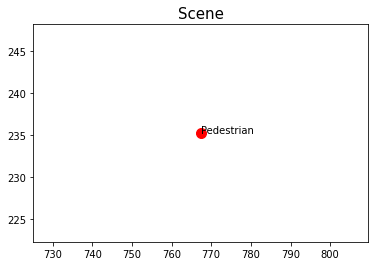

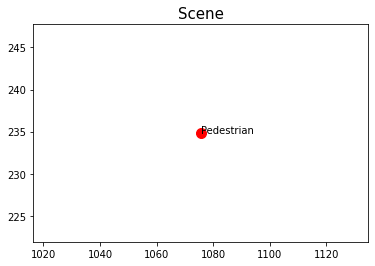

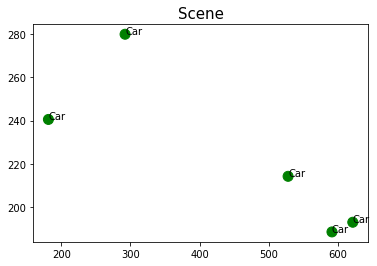

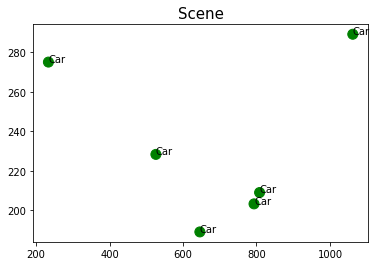

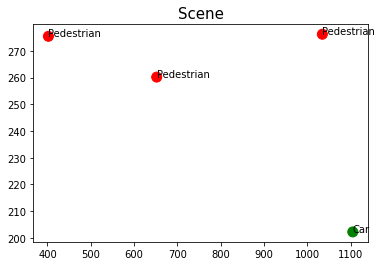

In [6]:
# import required module
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.patches as patches
 
# assign directory
label_directory = '/multiview/3d-count/Kitti/training/label_2'
image_directory = '/multiview/3d-count/Kitti/training/image_2'

real_classes = ['Car', 'Pedestrian','Cyclist']

distance_matrix = []

count = 0
# LOOPING THROUGH SCENES
for filename in os.listdir(label_directory):
    if count < 5:
        f = os.path.join(label_directory, filename)
        # checking if it is a file
        if os.path.isfile(f):
            image = image_directory + "/" + filename[0:-4] + '.png'
            img = mpimg.imread(image)
            fig, ax = plt.subplots()
            # Output Images
            xs = []
            ys = []
            classes = []
            colors = []
            with open(f) as label:
                label_data = label.readlines()

            # LOOPING THROUGH ITEMS IN SCENE
            for label in label_data:
                label = label.split(" ")
                if label[0] in real_classes:
                    bbox2D = []
                    bbox2D.append(float(label[4]))
                    bbox2D.append(float(label[5]))
                    bbox2D.append(float(label[6]))
                    bbox2D.append(float(label[7]))
                    x = ((bbox2D[0] + bbox2D[2]) / 2.0)
                    y = ((bbox2D[1] + bbox2D[3]) / 2.0)
                    xs.append(x)
                    ys.append(y)
                    classes.append(label[0])
                    if label[0] == 'Car':
                        colors.append('green')
                    if label[0] == 'Pedestrian':
                        colors.append('red')
                    if label[0] == 'Cyclist':
                        colors.append('blue')
            plt.scatter(xs,ys,s=100,color=colors)
            plt.title("Scene",fontsize=15)
            for i, label in enumerate(classes):
                plt.annotate(classes[i], (xs[i], ys[i]))
            plt.show()
        count = count + 1



# Plot Boxes over Intersections

In [3]:
import numpy as np
def get_distances(objects,index):
    distances = {}
    for key in objects.keys():
        if key == index:
            pass
        else:
            distances.update({key:np.linalg.norm(np.array(objects[index]['point']) - np.array(objects[key]['point']))})

    return distances

In [4]:
def get_clusters(objects):
    for key in objects.keys():
        max_dist = (objects[key]['width'] / 2) + (objects[key]['height'] / 2)
        print("max_dist: ", max_dist)
        print("distances: ", objects[key]['distances'])

    return clusters

/home/stephen/anaconda3/envs/thesis/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


--------------------NEW SCENE---------------------


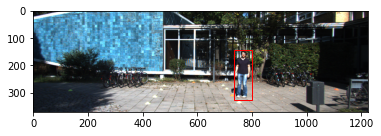

max_dist:  122.76499999999997
distances:  {}
--------------------NEW SCENE---------------------


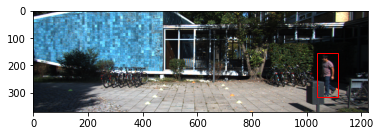

max_dist:  117.24000000000001
distances:  {}
--------------------NEW SCENE---------------------


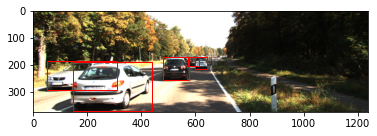

max_dist:  236.095
distances:  {1: 244.6896556865451, 2: 340.5255228686978, 3: 117.6131710311392, 4: 312.77184691880433}
max_dist:  89.95500000000003
distances:  {0: 244.6896556865451, 2: 95.91654249919569, 3: 347.61028868547606, 4: 68.42358383627675}
max_dist:  44.219999999999985
distances:  {0: 340.5255228686978, 1: 95.91654249919569, 3: 442.7142587776003, 4: 30.438523288753807}
max_dist:  183.16500000000002
distances:  {0: 117.6131710311392, 1: 347.61028868547606, 2: 442.7142587776003, 4: 413.325712513751}
max_dist:  37.86000000000003
distances:  {0: 312.77184691880433, 1: 68.42358383627675, 2: 30.438523288753807, 3: 413.325712513751}
--------------------NEW SCENE---------------------


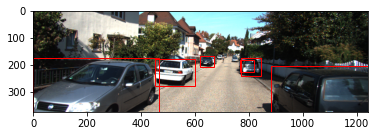

max_dist:  332.58
distances:  {1: 828.6298866955017, 2: 296.2799900432022, 3: 421.1090538684724, 4: 578.6277188745801, 5: 564.2518517692255}
max_dist:  263.70500000000004
distances:  {0: 828.6298866955017, 2: 539.3816652658858, 3: 428.1388603303839, 4: 266.02622939289273, 5: 282.2332103952333}
max_dist:  126.49
distances:  {0: 296.2799900432022, 1: 539.3816652658858, 3: 125.93914105630552, 4: 282.9350541201992, 5: 268.2680424966791}
max_dist:  47.24999999999997
distances:  {0: 421.1090538684724, 1: 428.1388603303839, 2: 125.93914105630552, 4: 163.82800645799242, 5: 148.11179198497325}
max_dist:  69.49000000000001
distances:  {0: 578.6277188745801, 1: 266.02622939289273, 2: 282.9350541201992, 3: 163.82800645799242, 5: 16.230755527701167}
max_dist:  50.18500000000003
distances:  {0: 564.2518517692255, 1: 282.2332103952333, 2: 268.2680424966791, 3: 148.11179198497325, 4: 16.230755527701167}
--------------------NEW SCENE---------------------


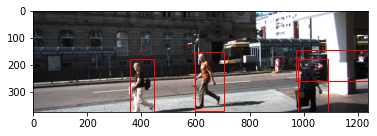

max_dist:  161.675
distances:  {1: 250.33737435708642, 2: 382.6971298559735, 3: 456.24979742461255}
max_dist:  142.005
distances:  {0: 250.33737435708642, 2: 632.2304688956391, 3: 706.2307848359486}
max_dist:  151.40499999999997
distances:  {0: 382.6971298559735, 1: 632.2304688956391, 3: 102.0515627023909}
max_dist:  188.02499999999998
distances:  {0: 456.24979742461255, 1: 706.2307848359486, 2: 102.0515627023909}


In [5]:
# import required module
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from scipy.spatial import distance_matrix
import pandas as pd

# assign directory
label_directory = '/multiview/3d-count/Kitti/training/label_2'
image_directory = '/multiview/3d-count/Kitti/training/image_2'

# iterate over files in
# that directory
count = 0
for filename in os.listdir(label_directory):
    ### how many scenes to process
    if count < 5:
        print("--------------------NEW SCENE---------------------")
        f = os.path.join(label_directory, filename)
        # checking if it is a file
        if os.path.isfile(f):
            image = image_directory + "/" + filename[0:-4] + '.png'
            real_img = mpimg.imread(image)
            img = np.zeros([real_img.shape[0],real_img.shape[1],real_img.shape[2]],dtype=np.uint8)
            img.fill(255) # or img[:] = 255
            fig, ax = plt.subplots()
            # Output Images
            with open(f) as label:
                label_data = label.readlines()
            boxes = []
            classes = []
            heights = []
            widths = []
            for label_data in label_data:
                label_data = label_data.split(" ")
                if label_data[0] == 'Car' or label_data[0] == 'Pedestrian' or label_data[0] == 'Cyclist':
                    bbox2D = []
                    bbox2D.append(float(label_data[4]))
                    bbox2D.append(float(label_data[5]))
                    bbox2D.append(float(label_data[6]))
                    bbox2D.append(float(label_data[7]))
                    x = ((bbox2D[0] + bbox2D[2]) / 2.0)
                    y = ((bbox2D[1] + bbox2D[3]) / 2.0)
                    w = (bbox2D[2] - bbox2D[0])
                    h = (bbox2D[3] - bbox2D[1])
                    new_x = x - (w/2)
                    new_y = y - (h/2)
                    boxes.append([x,y])
                    classes.append(label_data[0])
                    heights.append(h)
                    widths.append(w)
                    # Create a Rectangle patch
                    rect = patches.Rectangle((new_x, new_y), w, h, linewidth=1, edgecolor='r', facecolor='none')
                    # Add the patch to the Axes
                    ax.add_patch(rect)

            # boxes, classes = create_class_groups(boxes=boxes,classes=classes,num_classes=1)
            car_boxes, pedestrian_boxes, cyclist_boxes, sub_classes = create_class_groups(boxes=boxes,classes=classes,num_classes=3)
            classid = 0
            class_names = ['cars', 'pedestrians', 'cyclists']
            for class_boxes in [car_boxes, pedestrian_boxes, cyclist_boxes]:
                # print(class_names[classid],":", len(class_boxes)," objects")
                # print("class_boxes: ", class_boxes)

                object_index = []
                # print("classes: ", sub_classes[classid])
                if len(class_boxes) >1:
                    df = pd.DataFrame(class_boxes, columns=['xcord', 'ycord'], index=sub_classes[classid])
                
                # print()
                classid += 1

            # plt.imshow(img)
            plt.imshow(real_img)
            plt.show()
            count = count + 1

            clusters = []
            objects = {}
            # print()
            for i in range(len(boxes)):
                objects.update({i: {'point' : boxes[i],'class' : classes[i],'height': heights[i],'width': widths[i]}})
            for j in range(len(objects.keys())):
                objects[j].update({'distances':get_distances(objects,j)})
            
            clusters = get_clusters(objects)

            #### K MEANS
            
    